# 15 minute city - exploratory spatial data analysis

Following:
http://pysal.org/notebooks/explore/esda/Spatial_Autocorrelation_for_Areal_Unit_Data.html

In [1]:
import os
import sys

import pandas as pd
import geopandas as gpd
import osmnx as ox

import esda
import pysal

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

module_path = os.path.abspath(os.path.join('../../'))
if module_path not in sys.path:
    sys.path.append(module_path)
    import aup

/home/vscode/anaconda3/envs/odc/lib/python3.10/site-packages/geopandas/_compat.py:112: UserWarning: The Shapely GEOS version (3.10.2-CAPI-1.16.0) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(
/home/vscode/anaconda3/envs/odc/lib/python3.10/site-packages/osmnx/utils.py:192: UserWarning: The `utils.config` function is deprecated and will be removed in a future release. Instead, use the `settings` module directly to configure a global setting's value. For example, `ox.settings.log_console=True`.
  warnings.warn(


## Read local data

In [3]:
c = 'Guadalajara'
grl_dir = '../../data/processed/15_min_city/'

In [ ]:
grl_dir = '../../data/processed/15_min_city/'
nodes_15_min = gpd.read_file(grl_dir+f'{c}_15min_Analisis_nodes_vTotals.geojson', driver='GeoJSON')
print(nodes_15_min.shape)
nodes_15_min.head(2)

In [55]:
res = 8
hex_dist_res8 = gpd.read_file(grl_dir+f'HexRes{res}_{c}_15minAnalisis_vIndex.geojson', driver='GeoJSON')
res = 9
hex_dist_res9 = gpd.read_file(grl_dir+f'HexRes{res}_{c}_15minAnalisis_vIndex.geojson', driver='GeoJSON')

In [56]:
print(hex_dist_res8.shape)
hex_dist_res8.head(2)

(1160, 92)


,hex_id_8,sip_teatro,sip_cancha,sip_unidad_deportiva,sip_espacio_publico,sip_mercado,clues_primer_nivel,clues_segundo_nivel,clues_tercer_nivel,sip_centro_admin,...,idx_Personal,idx_Hogar,idx_Complementarios,idx_Comercio,idx_Social,idx_Actividad física,idx_Cultural,idx_Entretenimiento,idx_15_min,geometry
0,8849ab584bfffff,0.0,137.191468,256.430824,116.476644,164.385536,121.594888,129.387284,374.773118,152.454358,...,1.063000e-07,1.299863e-14,1.718622e-14,1.063002e-07,3.287058e-14,2.684229e-19,3.241892e-08,3.241895e-08,3.802245e-08,"POLYGON ((-103.48441 20.58748, -103.47988 20.5..."
1,8849ab5841fffff,0.0,127.721173,246.960529,107.006348,154.915241,112.124593,119.916989,365.302823,142.984062,...,1.259235e-06,4.136820e-13,5.469521e-13,1.259298e-06,1.046107e-12,3.770617e-18,3.840462e-07,3.840472e-07,4.504346e-07,"POLYGON ((-103.47480 20.58841, -103.47027 20.5..."


In [57]:
print(hex_dist_res9.shape)
hex_dist_res9.head(2)

(6003, 92)


,hex_id_9,sip_teatro,sip_cancha,sip_unidad_deportiva,sip_espacio_publico,sip_mercado,clues_primer_nivel,clues_segundo_nivel,clues_tercer_nivel,sip_centro_admin,...,idx_Personal,idx_Hogar,idx_Complementarios,idx_Comercio,idx_Social,idx_Actividad física,idx_Cultural,idx_Entretenimiento,idx_15_min,geometry
0,8949aa252bbffff,0.0,82.776419,296.284598,11.509728,81.590992,77.138481,70.652399,261.494928,80.649753,...,0.132999,0.128065,0.000011,0.619876,0.134526,0.142467,3.363293e-07,0.276992,0.339568,"POLYGON ((-103.40480 20.46253, -103.40358 20.4..."
1,8949ab5943bffff,0.0,39.076549,75.017473,17.406505,35.853914,20.820088,51.367568,197.413242,60.702885,...,0.132955,0.091810,0.061965,0.406870,0.215580,0.202708,2.998918e-01,0.718180,0.346718,"POLYGON ((-103.40982 20.60369, -103.40860 20.6..."


## Spatial data analysis

### Data distribution

In [58]:
hex_esda = hex_dist_res9.copy()

<AxesSubplot:>

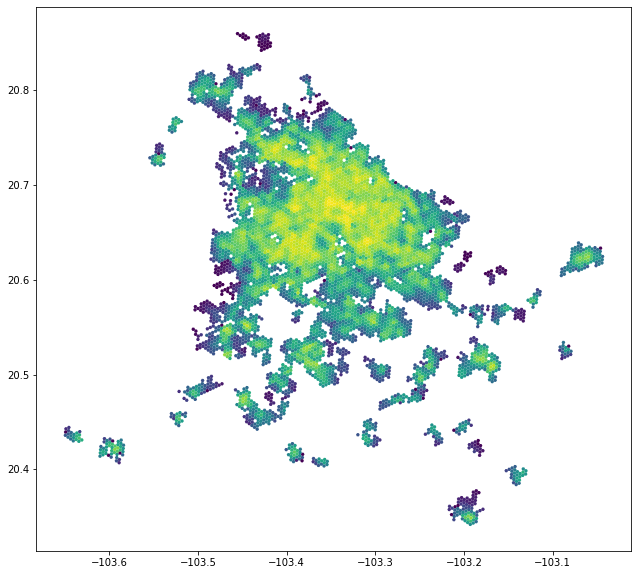

In [80]:
column_analysis = 'idx_15_min'

fig, ax = plt.subplots(figsize=(12,10), subplot_kw={'aspect':'equal'})
hex_esda.plot(column=column_analysis, linewidth=0.4, ax=ax)

<AxesSubplot:>

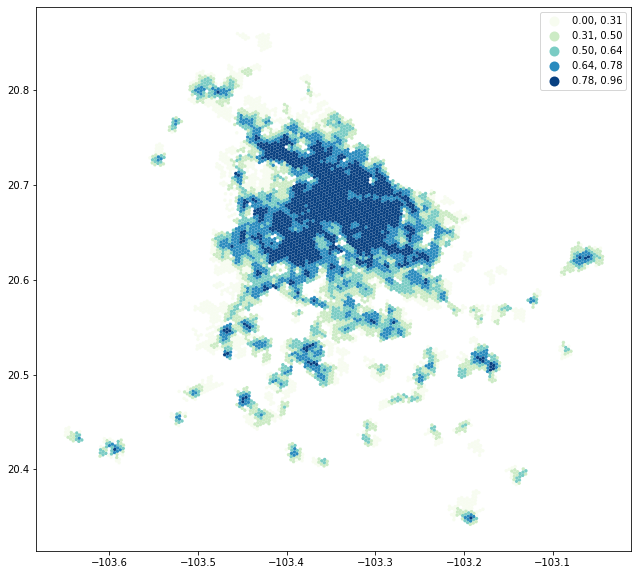

In [81]:
fig, ax = plt.subplots(figsize=(12,10), subplot_kw={'aspect':'equal'})
hex_esda.plot(column=column_analysis, 
              linewidth=0.2, scheme='Quantiles', 
              k=5, cmap='GnBu', legend=True, ax=ax)

### Spatial autocorrelation

In [82]:
import libpysal as lps

df = hex_esda
wq =  lps.weights.Queen.from_dataframe(df)
wq.transform = 'r'

('WARNING: ', 13, ' is an island (no neighbors)')
('WARNING: ', 279, ' is an island (no neighbors)')
('WARNING: ', 2591, ' is an island (no neighbors)')
('WARNING: ', 4690, ' is an island (no neighbors)')
('WARNING: ', 5084, ' is an island (no neighbors)')
('WARNING: ', 5364, ' is an island (no neighbors)')


/home/vscode/anaconda3/envs/odc/lib/python3.10/site-packages/libpysal/weights/weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 48 disconnected components.
 There are 6 islands with ids: 13, 279, 2591, 4690, 5084, 5364.
  warnings.warn(message)


In [83]:
y = df[column_analysis]
ylag = lps.weights.lag_spatial(wq, y)

In [84]:
ylag

array([0.39497721, 0.56950471, 0.61497859, ..., 0.70203049, 0.66196176,
       0.76837086])

In [85]:
import mapclassify as mc
ylagq5 = mc.Quantiles(ylag, k=5)

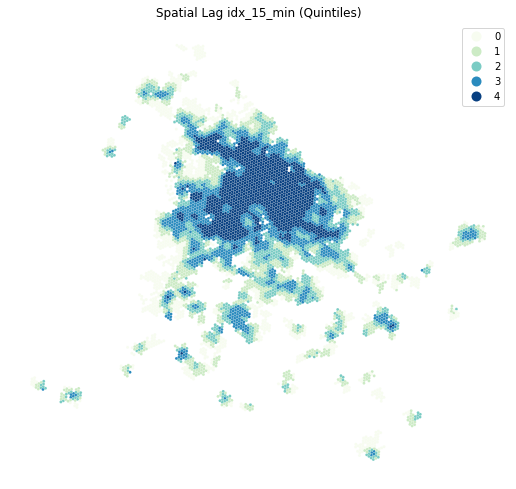

In [86]:
f, ax = plt.subplots(1, figsize=(9, 9))
df.assign(cl=ylagq5.yb).plot(column='cl', categorical=True, \
        k=5, cmap='GnBu', linewidth=0.1, ax=ax, \
        edgecolor='white', legend=True)
ax.set_axis_off()
plt.title(f"Spatial Lag {column_analysis} (Quintiles)")

plt.show()

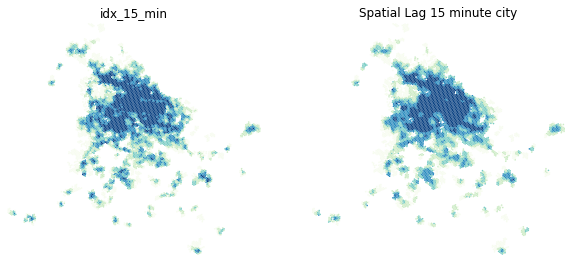

In [87]:
import numpy as np

df[f'lag_{column_analysis}'] = ylag
f,ax = plt.subplots(1,2,figsize=(10,8))
df.plot(column=column_analysis, ax=ax[0], linewidth=0.1,
        scheme="quantiles",  k=5, cmap='GnBu')
ax[0].axis(df.total_bounds[np.asarray([0,2,1,3])])
ax[0].set_title(column_analysis)
df.plot(column=f'lag_{column_analysis}', ax=ax[1], linewidth=0.1,
        scheme='quantiles', cmap='GnBu', k=5)
ax[1].axis(df.total_bounds[np.asarray([0,2,1,3])])
ax[1].set_title("Spatial Lag 15 minute city")
ax[0].axis('off')
ax[1].axis('off')
plt.show()

### Global spatial autocorrelation

In [88]:
y.median()

0.5691164981742821

In [89]:
y_above = y > y.median()
sum(y_above)

3001

In [90]:
y_below = y < y.median()
sum(y_below)

3001

In [91]:
labels = ["0 Low", "1 High"]
y_above = [labels[i] for i in 1*y_above] 
df['yb'] = y_above

<AxesSubplot:>

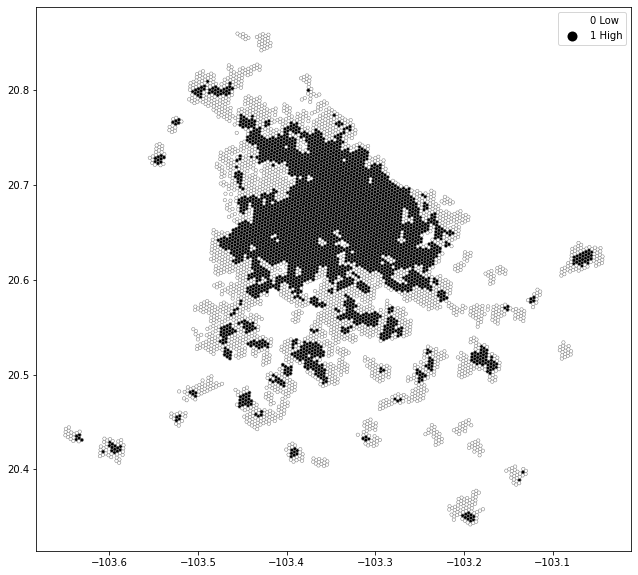

In [92]:
fig, ax = plt.subplots(figsize=(12,10), subplot_kw={'aspect':'equal'})
df.plot(column='yb', cmap='binary', linewidth=0.5, edgecolor='grey', legend=True, ax=ax)

In [93]:
yb = 1 * (y > y.median()) # convert back to binary
wq =  lps.weights.Queen.from_dataframe(df)
wq.transform = 'b'
np.random.seed(12345)
jc = esda.join_counts.Join_Counts(yb, wq)

/home/vscode/anaconda3/envs/odc/lib/python3.10/site-packages/libpysal/weights/weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 48 disconnected components.
 There are 6 islands with ids: 13, 279, 2591, 4690, 5084, 5364.
  warnings.warn(message)


In [94]:
jc.mean_bb

3914.5935935935936

Text(0.5, 0, 'BB Counts')

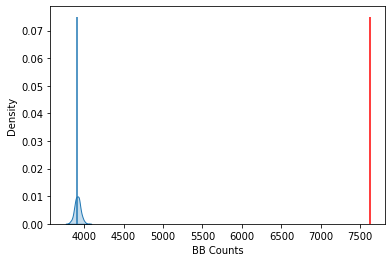

In [95]:
import seaborn as sbn
sbn.kdeplot(jc.sim_bb, shade=True)
plt.vlines(jc.bb, 0, 0.075, color='r')
plt.vlines(jc.mean_bb, 0,0.075)
plt.xlabel('BB Counts')

#### pseudo p-value

In [96]:
jc.p_sim_bb

0.001

### continuous case

In [97]:
wq.transform = 'r'

('WARNING: ', 13, ' is an island (no neighbors)')
('WARNING: ', 279, ' is an island (no neighbors)')
('WARNING: ', 2591, ' is an island (no neighbors)')
('WARNING: ', 4690, ' is an island (no neighbors)')
('WARNING: ', 5084, ' is an island (no neighbors)')
('WARNING: ', 5364, ' is an island (no neighbors)')


In [98]:
y = df[column_analysis]

#### Moran's I

In [99]:
np.random.seed(12345)
mi = esda.moran.Moran(y, wq)
mi.I

0.8867921445751785

Text(0.5, 0, "Moran's I")

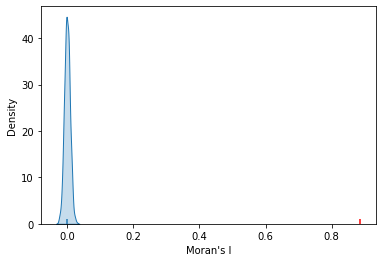

In [100]:
sbn.kdeplot(mi.sim, shade=True)
plt.vlines(mi.I, 0, 1, color='r')
plt.vlines(mi.EI, 0,1)
plt.xlabel("Moran's I")

In [101]:
mi.p_sim

0.001

### Local auto-correlation

In [102]:
np.random.seed(12345)

In [103]:
wq.transform = 'r'
lag_time = lps.weights.lag_spatial(wq, df[column_analysis])

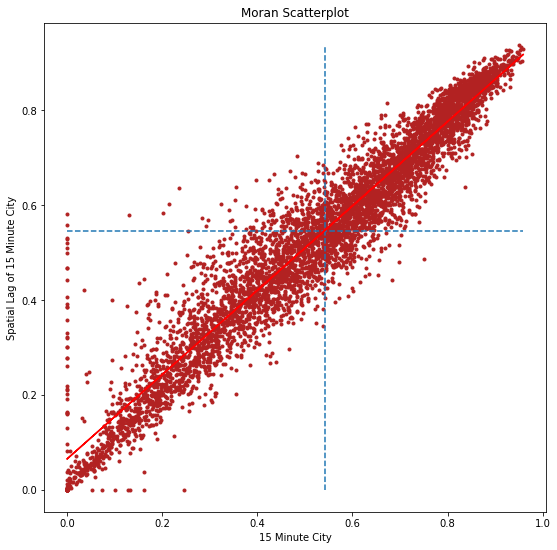

In [104]:
time = df[column_analysis]
b, a = np.polyfit(time, lag_time, 1)
f, ax = plt.subplots(1, figsize=(9, 9))

plt.plot(time, lag_time, '.', color='firebrick')

 # dashed vert at mean of the price
plt.vlines(time.mean(), lag_time.min(), lag_time.max(), linestyle='--')
 # dashed horizontal at mean of lagged price 
plt.hlines(lag_time.mean(), time.min(), time.max(), linestyle='--')

# red line of best fit using global I as slope
plt.plot(time, a + b*time, 'r')
plt.title('Moran Scatterplot')
plt.ylabel('Spatial Lag of 15 Minute City')
plt.xlabel('15 Minute City')
plt.show()

In [105]:
wq = lps.weights.distance.Kernel.from_dataframe(df[[column_analysis,'geometry']])

li = esda.moran.Moran_Local(y, wq)

/home/vscode/anaconda3/envs/odc/lib/python3.10/site-packages/libpysal/weights/weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 25 disconnected components.
  warnings.warn(message)


In [106]:
li.q

array([3, 3, 2, ..., 1, 1, 1])

In [107]:
(li.p_sim < 0.05).sum()

3695

In [108]:
sig = li.p_sim < 0.05
hotspot = sig * li.q==1
coldspot = sig * li.q==3
doughnut = sig * li.q==2
diamond = sig * li.q==4

In [109]:
spots = ['n.sig.', 'hot spot']
labels = [spots[i] for i in hotspot*1]

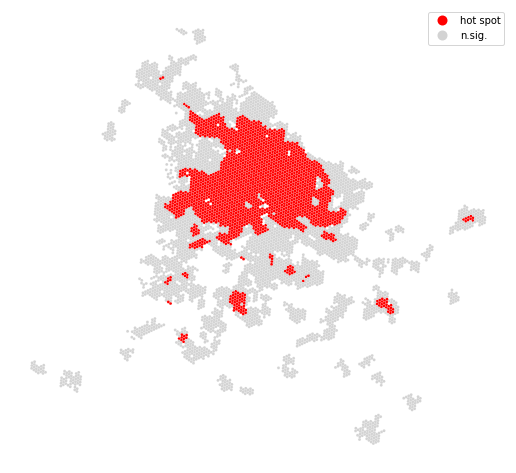

In [110]:
df = df
from matplotlib import colors
hmap = colors.ListedColormap(['red', 'lightgrey'])
f, ax = plt.subplots(1, figsize=(9, 9))
df.assign(cl=labels).plot(column='cl', categorical=True, \
        k=2, cmap=hmap, linewidth=0.1, ax=ax, \
        edgecolor='white', legend=True)
ax.set_axis_off()
plt.show()

In [111]:
spots = ['n.sig.', 'cold spot']
labels = [spots[i] for i in coldspot*1]

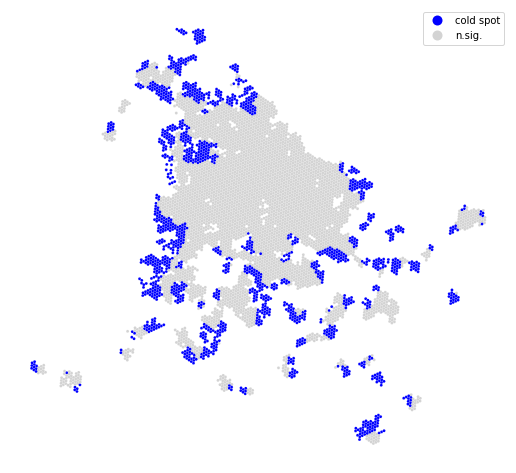

In [112]:
df = df
from matplotlib import colors
hmap = colors.ListedColormap(['blue', 'lightgrey'])
f, ax = plt.subplots(1, figsize=(9, 9))
df.assign(cl=labels).plot(column='cl', categorical=True, \
        k=2, cmap=hmap, linewidth=0.1, ax=ax, \
        edgecolor='white', legend=True)
ax.set_axis_off()
plt.show()

In [113]:
sig = 1 * (li.p_sim < 0.05)
hotspot = 1 * (sig * li.q==1)
coldspot = 3 * (sig * li.q==3)
doughnut = 2 * (sig * li.q==2)
diamond = 4 * (sig * li.q==4)
spots = hotspot + coldspot + doughnut + diamond
spots

array([3, 0, 0, ..., 1, 1, 1])

In [114]:
spot_labels = [ '0 ns', '1 hot spot', '2 doughnut', '3 cold spot', '4 diamond']
labels = [spot_labels[i] for i in spots]

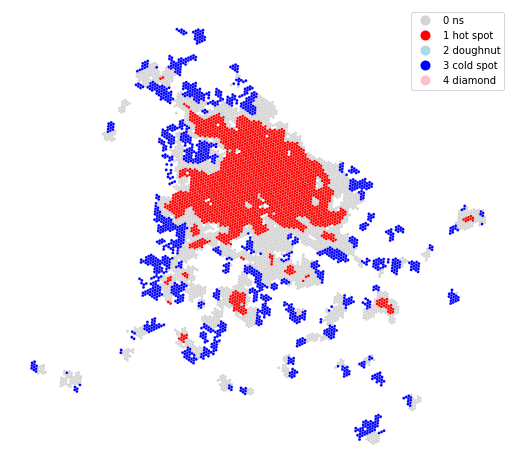

In [115]:
from matplotlib import colors
hmap = colors.ListedColormap([ 'lightgrey', 'red', 'lightblue', 'blue', 'pink'])
f, ax = plt.subplots(1, figsize=(9, 9))
df.assign(cl=labels).plot(column='cl', categorical=True, \
        k=2, cmap=hmap, linewidth=0.1, ax=ax, \
        edgecolor='white', legend=True)
ax.set_axis_off()
plt.show()

In [116]:
from splot import esda as esdaplot

In [117]:
lisa = esda.moran.Moran_Local(df[column_analysis], wq)

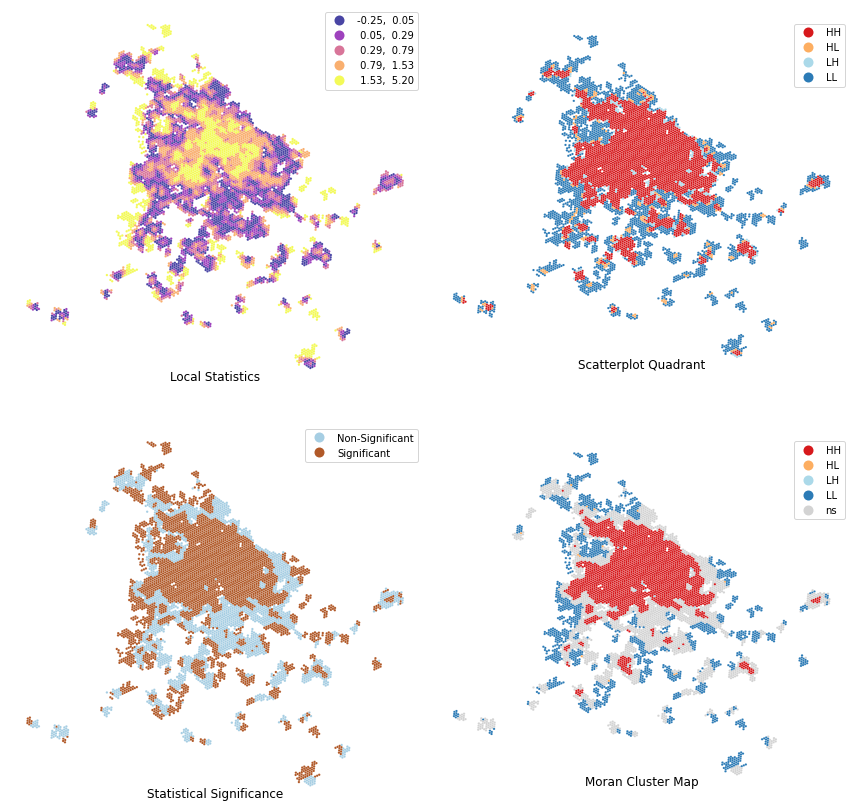

In [118]:
# Set up figure and axes
f, axs = plt.subplots(nrows=2, ncols=2, figsize=(12, 12))
# Make the axes accessible with single indexing
axs = axs.flatten()

                    # Subplot 1 #
            # Choropleth of local statistics
# Grab first axis in the figure
ax = axs[0]
# Assign new column with local statistics on-the-fly
df.assign(
    Is=lisa.Is
# Plot choropleth of local statistics
).plot(
    column='Is', 
    cmap='plasma', 
    scheme='quantiles',
    k=5, 
    edgecolor='white', 
    linewidth=0.1, 
    alpha=0.75,
    legend=True,
    ax=ax
)

                    # Subplot 2 #
                # Quadrant categories
# Grab second axis of local statistics
ax = axs[1]
# Plot Quandrant colors (note to ensure all polygons are assigned a
# quadrant, we "trick" the function by setting significance level to
# 1 so all observations are treated as "significant" and thus assigned
# a quadrant color
esdaplot.lisa_cluster(lisa, df, p=1, ax=ax);

                    # Subplot 3 #
                # Significance map
# Grab third axis of local statistics
ax = axs[2]
# 
# Find out significant observations
labels = pd.Series(
    1 * (lisa.p_sim < 0.05), # Assign 1 if significant, 0 otherwise
    index=df.index           # Use the index in the original data
# Recode 1 to "Significant and 0 to "Non-significant"
).map({1: 'Significant', 0: 'Non-Significant'})
# Assign labels to `db` on the fly
df.assign(
    cl=labels
# Plot choropleth of (non-)significant areas
).plot(
    column='cl', 
    categorical=True,
    k=2,
    cmap='Paired',
    linewidth=0.1,
    edgecolor='white',
    legend=True,
    ax=ax
)

                       
                    # Subplot 4 #
                    # Cluster map
# Grab second axis of local statistics
ax = axs[3]
# Plot Quandrant colors In this case, we use a 5% significance
# level to select polygons as part of statistically significant
# clusters
esdaplot.lisa_cluster(lisa, df, p=0.05, ax=ax);

                    # Figure styling #
# Set title to each subplot
for i, ax in enumerate(axs.flatten()):
    ax.set_axis_off()
    ax.set_title(
        [
            'Local Statistics', 
            'Scatterplot Quadrant', 
            'Statistical Significance', 
            'Moran Cluster Map'
        ][i], y=0
    )
# Tight layout to minimise in-betwee white space
f.tight_layout()

# Display the figure
plt.show()

